# Практическая работа №5
# Ансамбли моделей

## Импорт необходимых библиотек

In [1]:
import warnings

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Lars, Ridge, ElasticNet, RidgeCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, \
    plot_tree, export_graphviz, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

from functions import draw_graphics_bagg, draw_graphics_boost, draw_graphics_stack, plot_histogram

from imblearn.under_sampling import RandomUnderSampler

from itertools import combinations

warnings.filterwarnings('ignore')

## Задача классификации
### Загрузка данных для задачи классификации

In [2]:
dataframe_train_clas = pd.read_csv("../data/train_clas.csv")
dataframe_test_clas = pd.read_csv("../data/test_clas.csv")
dataframe_train_clas.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,213892,Male,48,1,35.0,1,1-2 Year,No,24922.0,26.0,86,0
1,269011,Male,58,1,28.0,0,1-2 Year,Yes,63541.0,26.0,57,0
2,31464,Male,44,1,28.0,1,1-2 Year,No,30027.0,26.0,286,0
3,86379,Female,22,1,8.0,0,< 1 Year,Yes,35039.0,152.0,180,0
4,456843,Male,24,1,6.0,1,< 1 Year,No,24149.0,152.0,17,0
5,195890,Female,49,1,28.0,0,1-2 Year,Yes,2630.0,157.0,156,0
6,111681,Male,28,1,6.0,1,< 1 Year,No,31154.0,152.0,150,0
7,427068,Male,22,1,12.0,1,< 1 Year,No,27956.0,152.0,174,0
8,337519,Female,25,1,14.0,1,< 1 Year,No,32658.0,152.0,32,0
9,12666,Male,47,1,0.0,0,1-2 Year,Yes,2630.0,26.0,79,0


### Предварительная обработка исходных данных
Выведем информацию о таблицах.

In [3]:
dataframe_train_clas.info()
dataframe_test_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229292 entries, 0 to 229291
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    229292 non-null  int64  
 1   Gender                229292 non-null  object 
 2   Age                   229292 non-null  int64  
 3   Driving_License       229292 non-null  int64  
 4   Region_Code           229292 non-null  float64
 5   Previously_Insured    229292 non-null  int64  
 6   Vehicle_Age           229292 non-null  object 
 7   Vehicle_Damage        229292 non-null  object 
 8   Annual_Premium        229292 non-null  float64
 9   Policy_Sales_Channel  229292 non-null  float64
 10  Vintage               229292 non-null  int64  
 11  Response              229292 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 21.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152862 entries, 0 to 152861
Data columns (total 

In [4]:
dataframe_train_clas.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Из вывода видно, что в столбцах нет пустых значений
Так как признак id не играет важной роли в предсказании, то можем удалить его из датафреймов.

In [5]:
dataframe_train_clas.drop("id", axis=1, inplace=True)
test_ids_clas = dataframe_test_clas["id"]
dataframe_test_clas.drop("id", axis=1, inplace=True)

Разделим наши признаки на категориальные и числовые

In [6]:
dataframe_categorical_clas = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
dataframe_numerical_clas = ["Age", "Driving_License", "Previously_Insured",
                            "Region_Code", "Annual_Premium",
                            "Policy_Sales_Channel",
                            "Vintage"]
dataframe_all_clas = dataframe_numerical_clas + dataframe_categorical_clas
result_column_clas = "Response"

Для классификации выберем 20000 элементов из датафрейма, используя метод сэмплирования из библиотеки Pandas.

In [7]:
number_of_elements = 20000  # Количество элементов
dataframe_train_clas = dataframe_train_clas.sample(n=number_of_elements,
                                                   replace=False)  # replace: флаг, указывающий, следует ли использовать повторения при выборке.
dataframe_train_clas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 3267 to 6626
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                20000 non-null  object 
 1   Age                   20000 non-null  int64  
 2   Driving_License       20000 non-null  int64  
 3   Region_Code           20000 non-null  float64
 4   Previously_Insured    20000 non-null  int64  
 5   Vehicle_Age           20000 non-null  object 
 6   Vehicle_Damage        20000 non-null  object 
 7   Annual_Premium        20000 non-null  float64
 8   Policy_Sales_Channel  20000 non-null  float64
 9   Vintage               20000 non-null  int64  
 10  Response              20000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


Произведём кодирование категориальных признаков.

In [8]:
label_encoder = LabelEncoder()
for column in dataframe_categorical_clas:
    dataframe_train_clas[column] = label_encoder.fit_transform(
        dataframe_train_clas[column])
    dataframe_test_clas[column] = label_encoder.fit_transform(
        dataframe_test_clas[column])

    dataframe_train_clas[column] = dataframe_train_clas[column].astype(
        "category")
    dataframe_test_clas[column] = dataframe_test_clas[column].astype("category")
    print(dataframe_train_clas[column].unique())

[1, 0]
Categories (2, int64): [0, 1]
[0, 1, 2]
Categories (3, int64): [0, 1, 2]
[1, 0]
Categories (2, int64): [0, 1]


Произведём нормирование числовых признаков

In [9]:
min_max_scaler = MinMaxScaler()
dataframe_train_clas[dataframe_numerical_clas] = min_max_scaler.fit_transform(
    dataframe_train_clas[dataframe_numerical_clas])
dataframe_test_clas[dataframe_numerical_clas] = min_max_scaler.fit_transform(
    dataframe_test_clas[dataframe_numerical_clas])
dataframe_train_clas.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,0.293371,0.998650,0.509752,0.488200,0.083614,0.684823,0.498434,0.15980
std,0.242280,0.036718,0.254948,0.499873,0.049996,0.335442,0.286767,0.36643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.079365,1.000000,0.288462,0.000000,0.065226,0.154321,0.252595,0.00000
50%,0.253968,1.000000,0.538462,0.000000,0.086107,0.925926,0.498270,0.00000
75%,0.460317,1.000000,0.692308,1.000000,0.109562,0.932099,0.747405,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Сэмплирование данных

In [10]:
x_clas = dataframe_train_clas[dataframe_all_clas]
y_clas = dataframe_train_clas[result_column_clas]

x_clas, y_clas = RandomUnderSampler().fit_resample(x_clas, y_clas)

In [11]:
x_train_clas, x_test_clas, y_train_clas, y_test_clas = train_test_split(x_clas,
                                                                        y_clas,
                                                                        test_size=0.3,
                                                                        random_state=7)

### Графики зависимости значений метрик от значений параметров модели для бэггинга

In [12]:
def create_and_train_bagg_clas(parameters_values: dict,
                               model_name: str) -> None:
    """
    Функция, отвечающая за перебор различных параметров бэггинга и вычисления
    значений оценок на тестовой и обучающей выборках.
    :param parameters_values: Словарь с перебираемыми параметрами
    :param algo_name: Название алгоритма
    :return: None
    """
    # Перебираем ключи и значения словаря parameters_values
    for parameter_name, parameter_value in parameters_values.items():

        if parameter_name == 'name':
            break
        # Получаем диапазон, тренировочные и тестовые значения из вложенного словаря
        parameter_range = parameter_value['range']
        train_scores = parameter_value['train_scores']
        test_scores = parameter_value['test_scores']

        for value in parameter_range:

            if model_name == "tree":
                default_algo = BaggingClassifier(n_estimators=value,
                                                 estimator=DecisionTreeClassifier(
                                                     random_state=42),
                                                 random_state=3, n_jobs=-1)
            elif model_name == "logreg":
                default_algo = BaggingClassifier(n_estimators=value,
                                                 estimator=LogisticRegression(
                                                     random_state=42),
                                                 random_state=3, n_jobs=-1)
            elif model_name == "svc":
                default_algo = BaggingClassifier(n_estimators=value,
                                                 estimator=SVC(probability=True,
                                                               kernel='linear',
                                                               random_state=42),
                                                 random_state=3, n_jobs=-1)

            # Обучаем классификатор на обучающей выборке
            default_algo.fit(x_train_clas, y_train_clas)

            # Предсказываем вероятности для обучающей выборки
            y_pred = default_algo.predict_proba(x_train_clas)[:, 1]

            # Вычисляем значение roc_auc на обучающей выборке
            train_score = roc_auc_score(y_train_clas, y_pred)
            train_scores.append(train_score)

            # Предсказываем вероятности для тестовой выборки
            y_pred = default_algo.predict_proba(x_test_clas)[:, 1]

            # Вычисляем значение roc_auc на тестовой выборке
            test_score = roc_auc_score(y_test_clas, y_pred)
            test_scores.append(test_score)

In [13]:
parameters_values_bagg_tree_clas = {
    "n_estimators": {
        'range': range(10, 151, 10),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "DecisionTreeClassifier"
}

parameters_values_bagg_logreg_clas = {
    "n_estimators": {
        'range': range(10, 151, 10),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "LogisticRegression"
}

parameters_values_bagg_svc_clas = {
    "n_estimators": {
        'range': range(10, 151, 10),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "SVC"
}

In [14]:
create_and_train_bagg_clas(parameters_values_bagg_tree_clas, "tree")
create_and_train_bagg_clas(parameters_values_bagg_logreg_clas, "logreg")
create_and_train_bagg_clas(parameters_values_bagg_svc_clas, "svc")

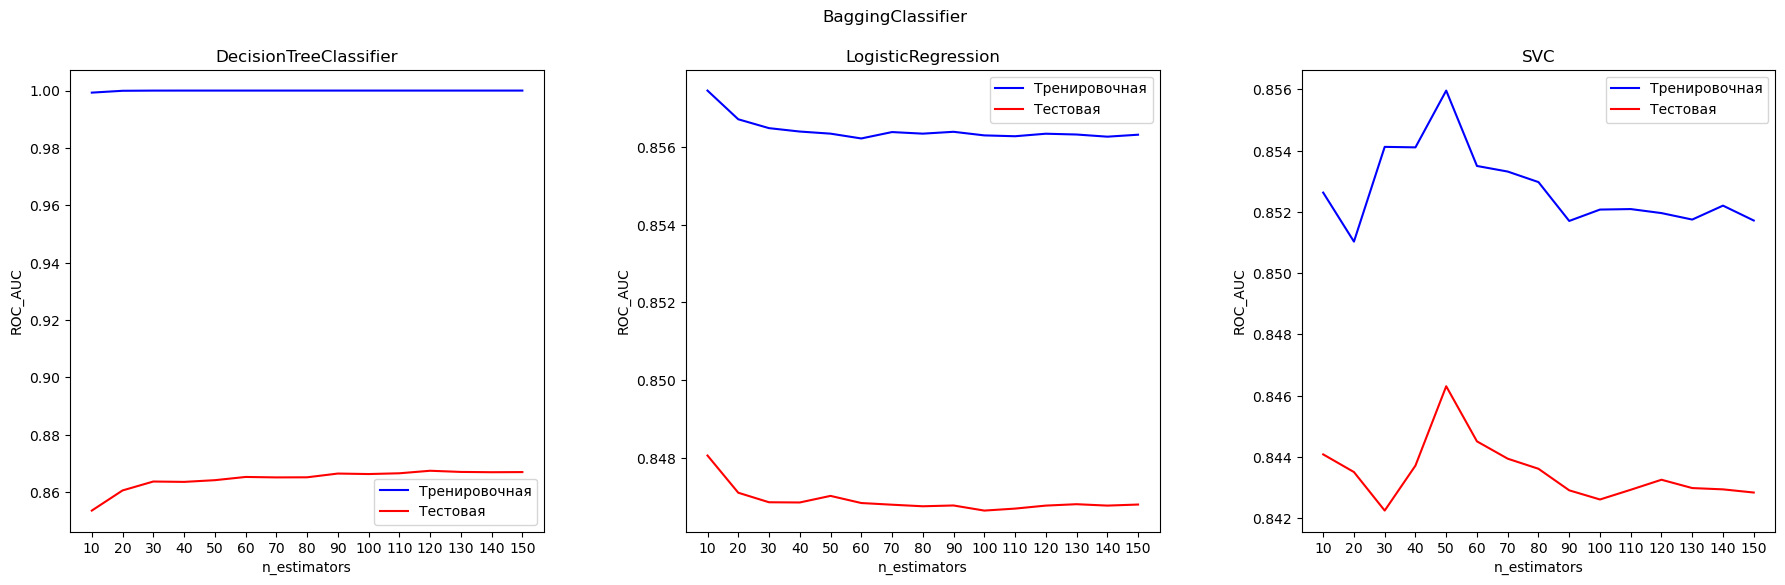

In [15]:
draw_graphics_bagg(parameters_values_bagg_tree_clas,
                   parameters_values_bagg_logreg_clas,
                   parameters_values_bagg_svc_clas,
                   "BaggingClassifier")

В качестве базовой модели был выбран <b>DecisionTreeClassifier</b>.

### Бэггинг

In [18]:
def train_algorythm(composition_algorithms, param_grid: dict, scoring, x_train,
                    y_train) -> GridSearchCV:
    print("Исследование зависимости качества прогнозирования от параметров...")

    new_model = GridSearchCV(composition_algorithms, param_grid,
                             scoring=scoring, n_jobs=-1,
                             cv=5).fit(x_train, y_train)

    print(new_model.best_estimator_)
    # выводим лучшие значения параметров и соответствующее значение score
    print("Best accuracy:", round(new_model.best_score_, 3))

    return new_model

In [20]:
# Сетка параметров для BaggingClassifier
bagging_params = {
    "estimator": [DecisionTreeClassifier(random_state=42)],
    # Базовый алгоритм для обучения на подвыборках данных
    "n_estimators": range(90, 131, 2),
    # Количество базовых алгоритмов в композиции
    "max_samples": [0.5, 0.8, 1.0],
    # Доля или количество объектов для обучения каждого базового алгоритма
    "max_features": [0.5, 0.8, 1.0],
    # Доля или количество признаков для обучения каждого базового алгоритма
    "bootstrap": [True, False],
    # Флаг, указывающий, выбирать ли объекты с возвращением или без
}

print("BaggingClassifier:")
result_clas_algo = train_algorythm(
    BaggingClassifier(random_state=42, n_jobs=-1),
    bagging_params, "roc_auc", x_train_clas,
    y_train_clas)
print("ROC-AUC: " + str(
    round(result_clas_algo.score(x_test_clas, y_test_clas), 3)))
round(
    cross_val_score(result_clas_algo, dataframe_train_clas[dataframe_all_clas],
                    dataframe_train_clas[result_column_clas], n_jobs=-1)[0], 3)

BaggingClassifier:
Исследование зависимости качества прогнозирования от параметров...
BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.5, n_estimators=124, n_jobs=-1,
                  random_state=42)
Best accuracy: 0.88
ROC-AUC: 0.872


0.883

### Графики зависимости значений метрик от значений параметров модели для бустинга

In [21]:
def create_and_train_boost_clas(parameters_values: dict,
                                model_name: str) -> None:
    """
    Функция, отвечающая за перебор различных параметров бустинга и вычисления
    значений оценок на тестовой и обучающей выборках.
    :param parameters_values: Словарь с перебираемыми параметрами
    :param algo_name: Название алгоритма
    :return: None
    """
    # Перебираем ключи и значения словаря parameters_values
    for parameter_name, parameter_value in parameters_values.items():

        if parameter_name == 'name':
            break
        # Получаем диапазон, тренировочные и тестовые значения из вложенного словаря
        parameter_range = parameter_value['range']
        train_scores = parameter_value['train_scores']
        test_scores = parameter_value['test_scores']

        for value in parameter_range:

            if parameter_name == "n_estimators":
                if model_name == "tree":
                    default_algo = AdaBoostClassifier(n_estimators=value,
                                                      estimator=DecisionTreeClassifier(
                                                          random_state=42),
                                                      random_state=3)
                elif model_name == "logreg":
                    default_algo = AdaBoostClassifier(n_estimators=value,
                                                      estimator=LogisticRegression(
                                                          random_state=42),
                                                      random_state=3)

                elif model_name == "svc":
                    default_algo = AdaBoostClassifier(n_estimators=value,
                                                      estimator=SVC(
                                                          probability=True,
                                                          kernel='linear',
                                                          random_state=42),
                                                      random_state=3)

            if parameter_name == "learning_rate":
                if model_name == "tree":
                    default_algo = AdaBoostClassifier(learning_rate=value,
                                                      estimator=DecisionTreeClassifier(
                                                          random_state=42),
                                                      random_state=3)
                elif model_name == "logreg":
                    default_algo = AdaBoostClassifier(learning_rate=value,
                                                      estimator=LogisticRegression(
                                                          random_state=42),
                                                      random_state=3)

                elif model_name == "svc":
                    default_algo = AdaBoostClassifier(learning_rate=value,
                                                      estimator=SVC(
                                                          probability=True,
                                                          kernel='linear',
                                                          random_state=42),
                                                      random_state=3)

            # Обучаем классификатор на обучающей выборке
            default_algo.fit(x_train_clas, y_train_clas)

            # Предсказываем вероятности для обучающей выборки
            y_pred = default_algo.predict_proba(x_train_clas)[:, 1]

            # Вычисляем значение roc_auc на обучающей выборке
            train_score = roc_auc_score(y_train_clas, y_pred)
            train_scores.append(train_score)

            # Предсказываем вероятности для тестовой выборки
            y_pred = default_algo.predict_proba(x_test_clas)[:, 1]

            # Вычисляем значение roc_auc на тестовой выборке
            test_score = roc_auc_score(y_test_clas, y_pred)
            test_scores.append(test_score)

In [22]:
parameters_values_ada_tree_clas = {
    "n_estimators": {
        'range': range(10, 151, 30),
        'train_scores': [],
        'test_scores': [],
    },
    "learning_rate": {
        'range': np.arange(0.1, 1.1, 0.2),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "DecisionTreeClassifier"
}

parameters_values_ada_logreg_clas = {
    "n_estimators": {
        'range': range(10, 151, 30),
        'train_scores': [],
        'test_scores': [],
    },
    "learning_rate": {
        'range': np.arange(0.1, 1.1, 0.2),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "LogisticRegression"
}

parameters_values_ada_svc_clas = {
    "n_estimators": {
        'range': range(10, 151, 30),
        'train_scores': [],
        'test_scores': [],
    },
    "learning_rate": {
        'range': np.arange(0.1, 1.1, 0.2),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "SVC"
}

In [23]:
create_and_train_boost_clas(parameters_values_ada_tree_clas, "tree")
create_and_train_boost_clas(parameters_values_ada_logreg_clas, "logreg")
create_and_train_boost_clas(parameters_values_ada_svc_clas, "svc")

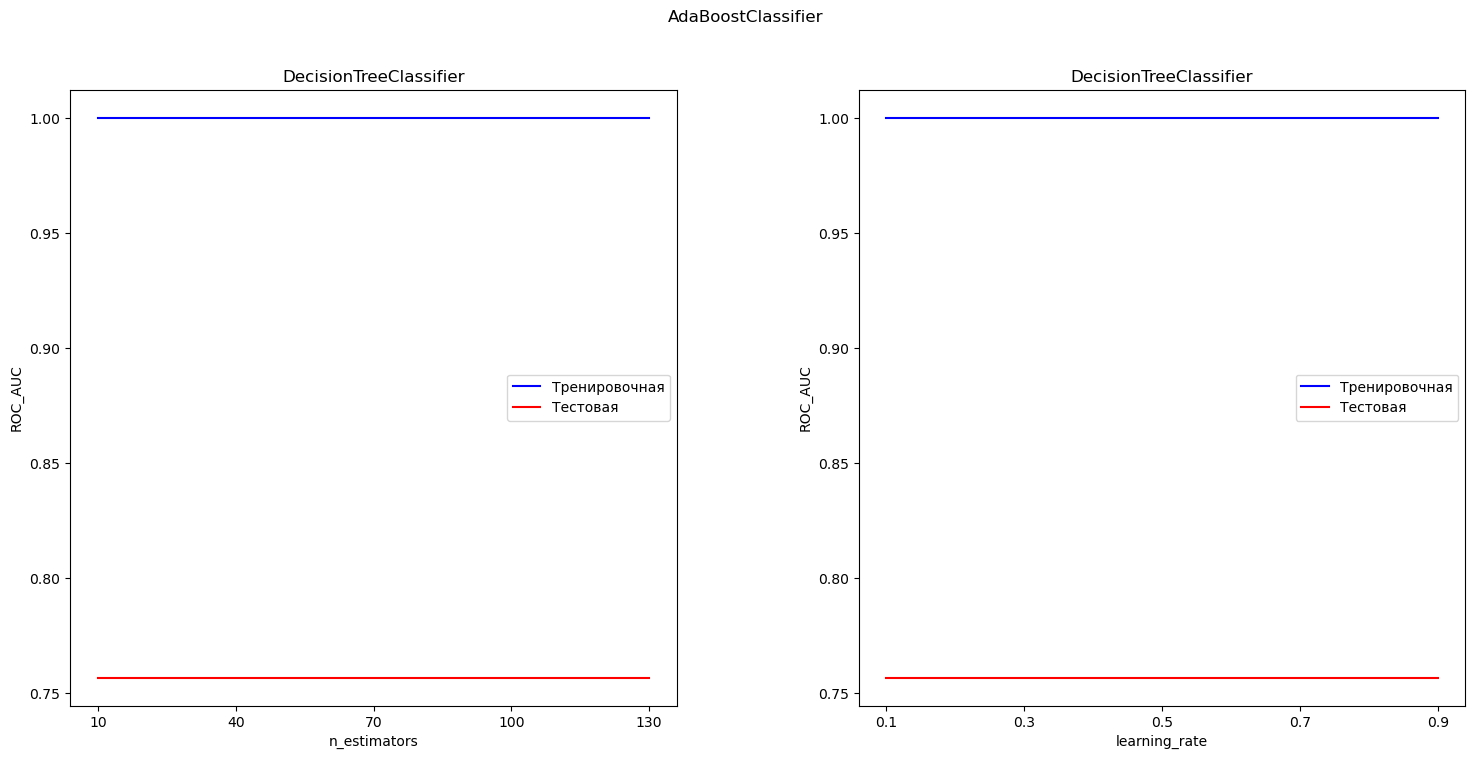

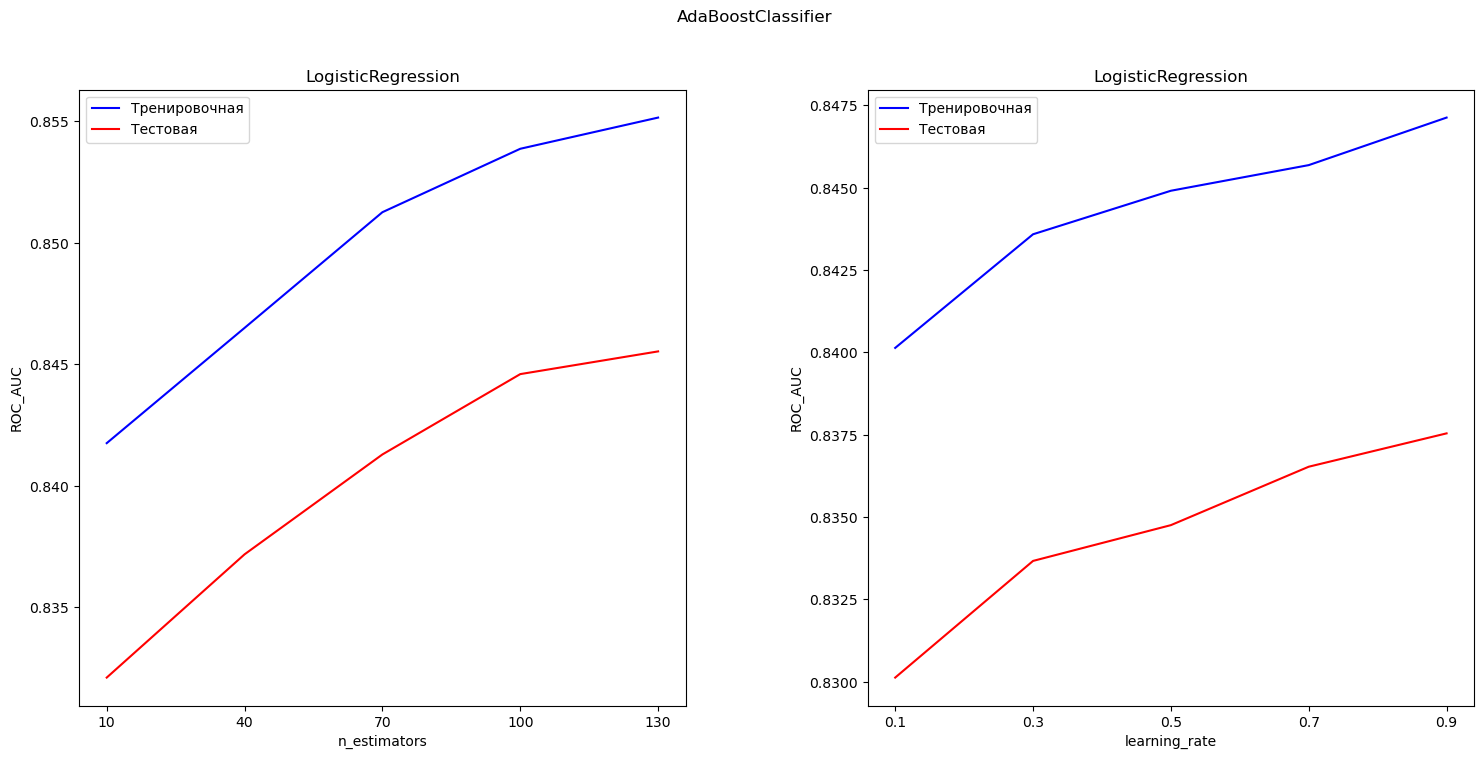

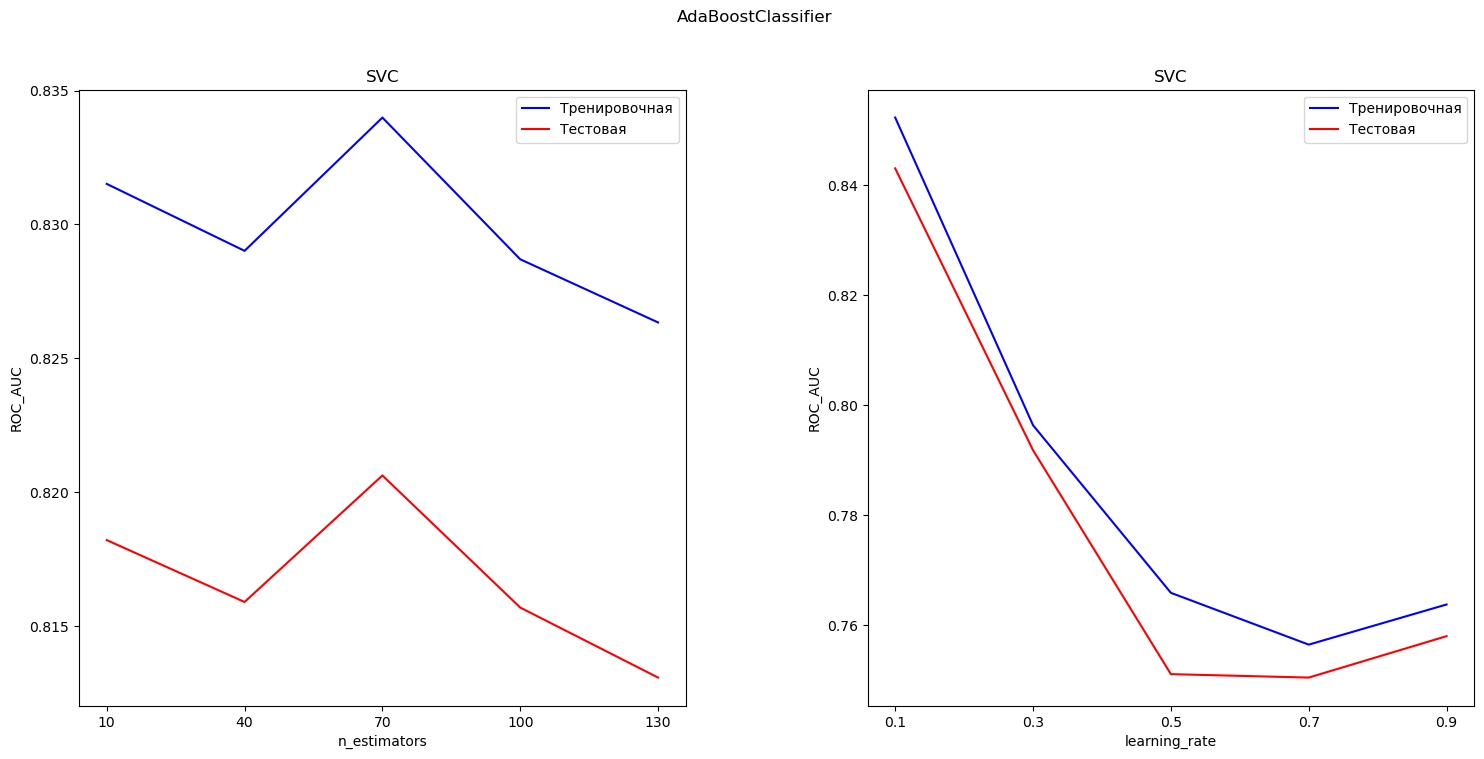

In [24]:
draw_graphics_boost(parameters_values_ada_tree_clas, "AdaBoostClassifier")
draw_graphics_boost(parameters_values_ada_logreg_clas, "AdaBoostClassifier")
draw_graphics_boost(parameters_values_ada_svc_clas, "AdaBoostClassifier")

В качестве базовой модели был выбран <b>LogisticRegression</b>.

### Бустинг
Адаптивный бустинг (AdaBoost) сначала обучает первую базовую модель(допустим деревья решений) на тренировочном наборе. Относительный вес некорректно предсказанных значений увеличивается. На вход второй базовой модели подаются обновлённые веса и модель обучается, после чего вырабатываются прогнозы и цикл повторяется.
Результат работы AdaBoost - это средневзвешенная сумма каждой модели. Спрогнозированным значением ансамбля будет тот, который получает большинство взвешенный голосов/ Adaboost обновляет веса объектов на каждой итерации. Веса хорошо классифицированных объектов уменьшаются относительно весов неправильно классифицированных объектов. Модели, которые работают лучше, имеют больший вес в окончательной модели ансамбля.
При адаптивном бустинге используется итеративный метод (добавляем слабых учеников одного за другим, просматривая каждую итерацию, чтобы найти наилучшую возможную пару (коэффициент, слабый ученик) для добавления к текущей модели ансамбля) изменения весов. Он работает быстрее, чем аналитический метод.

In [34]:
# Сетка параметров для AdaBoostClassifier
ada_boost_params = {
    "estimator": [LogisticRegression(random_state=42)],
    # базовый алгоритм для обучения на подвыборках с разными весами
    "n_estimators": range(110, 151, 2),
    # количество базовых алгоритмов в композиции
    "learning_rate": np.arange(0.6, 1.0, 0.1),
    # коэффициент обучения, который уменьшает вклад каждого базового алгоритма
    "algorithm": ["SAMME", "SAMME.R"],
    # алгоритм построения композиции: SAMME или SAMME.R
}

print("AdaBoostClassifier:")
result_clas_adaboost = train_algorythm(AdaBoostClassifier(random_state=42),
                                       ada_boost_params, "roc_auc",
                                       x_train_clas,
                                       y_train_clas)
print("ROC-AUC: " + str(
    round(result_clas_adaboost.score(x_test_clas, y_test_clas), 3)))
round(
    cross_val_score(result_clas_adaboost,
                    dataframe_train_clas[dataframe_all_clas],
                    dataframe_train_clas[result_column_clas], n_jobs=-1)[0], 3)

AdaBoostClassifier:
Исследование зависимости качества прогнозирования от параметров...
AdaBoostClassifier(estimator=LogisticRegression(random_state=42),
                   learning_rate=0.8999999999999999, n_estimators=150,
                   random_state=42)
Best accuracy: 0.853
ROC-AUC: 0.846


0.872

### Графики зависимости значений метрик от значений параметров модели для стекинга

In [28]:
def create_and_train_stack_clas(parameters: dict,
                                results: list, number: int) -> None:
    """
    Функция, отвечающая за перебор различных параметров стекинга и вычисления
    значений оценок на тестовой и обучающей выборках.
    :param parameters: Словарь с базовыми алгоритмами
    :param results: Список со всеми результатами
    :param number: Количество базовых алгоритмов
    :return: None
    """

    for combo in combinations(parameters, number):
        combo = list(combo)

        tmp_results = list()
        tmp_results.append(tuple([est[0] for est in combo]))

        stack = StackingClassifier(estimators=combo, n_jobs=-1)

        # Обучаем классификатор на обучающей выборке
        stack.fit(x_train_clas, y_train_clas)

        # Предсказываем вероятности для обучающей выборки
        y_pred = stack.predict_proba(x_train_clas)[:, 1]

        # Вычисляем значение roc_auc на обучающей выборке
        train_score = roc_auc_score(y_train_clas, y_pred)

        tmp_results.append(train_score)

        # Предсказываем вероятности для тестовой выборки
        y_pred = stack.predict_proba(x_test_clas)[:, 1]

        # Вычисляем значение roc_auc на тестовой выборке
        test_score = roc_auc_score(y_test_clas, y_pred)

        tmp_results.append(test_score)
        results.append(tmp_results)

In [31]:
estimators_clf = [('knn', KNeighborsClassifier()),
                  ('lr', LogisticRegression(random_state=42)),
                  ('dt', DecisionTreeClassifier(random_state=42)),
                  ('rf', RandomForestClassifier(random_state=42)),
                  ('svm', SVC(probability=True,
                              kernel='linear',
                              random_state=42)),
                  ('nb', GaussianNB())]

results_stack = list()
create_and_train_stack_clas(estimators_clf, results_stack, 4)

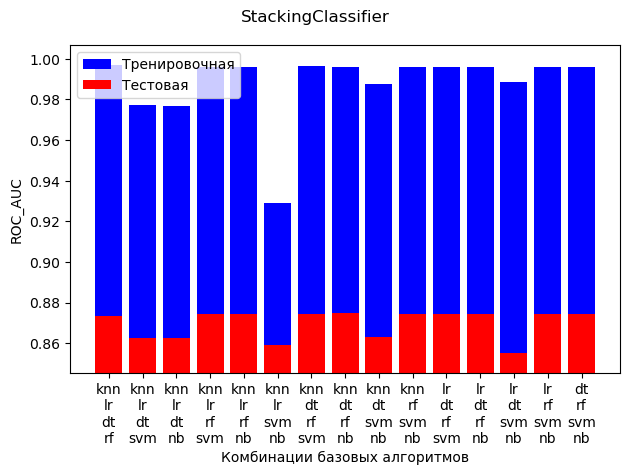

Лучшая комбинация:
knn
dt
rf
nb
Оценка ROC_AUC на тестовой выборке:
0.875


In [32]:
draw_graphics_stack(results_stack, "StackingClassifier", "ROC_AUC")

### Стекинг

In [33]:
estimators = [
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('nb', GaussianNB())
]

# Сетка параметров для StackingClassifier
stack_params = {
    "n_jobs": [-1],
    "cv": [3, 5, 10],
    "final_estimator": [
        LogisticRegression(random_state=42),
        DecisionTreeClassifier(random_state=42),
    ],
    # Методы, вызываемые для каждого базового оценщика.
    "stack_method": ["auto", "predict_proba"],
    # При установке в True позволяет передавать данные
    # входных признаков к финальному оценщику
    "passthrough": [True, False],
}

print("StackingClassifier:")
result_clas_stack = train_algorythm(StackingClassifier(estimators=estimators),
                                    stack_params, "roc_auc",
                                    x_train_clas,
                                    y_train_clas)
print("ROC-AUC: " + str(
    round(result_clas_stack.score(x_test_clas, y_test_clas), 3)))
round(
    cross_val_score(result_clas_stack,
                    dataframe_train_clas[dataframe_all_clas],
                    dataframe_train_clas[result_column_clas], n_jobs=-1)[0], 3)

StackingClassifier:
Исследование зависимости качества прогнозирования от параметров...
StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1, passthrough=True)
Best accuracy: 0.882
ROC-AUC: 0.875


0.881

### Сравнение результатов

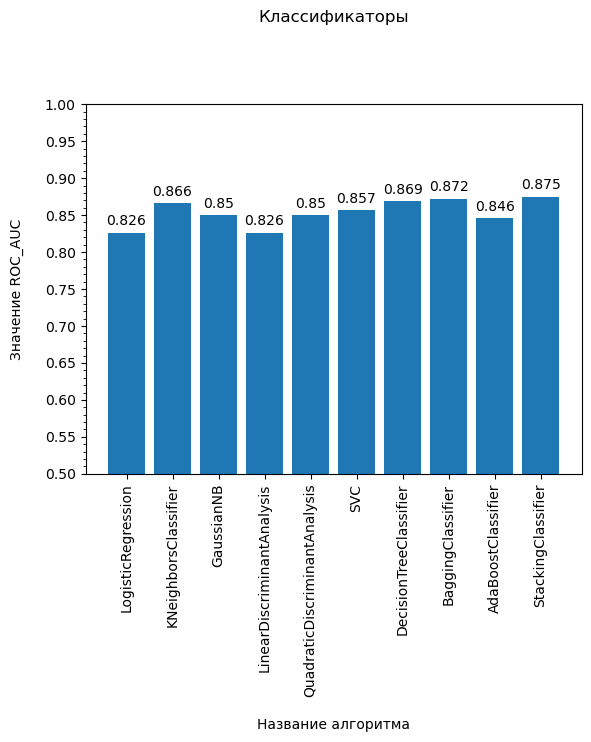

In [35]:
data = {
    "LogisticRegression": 0.826,
    "KNeighborsClassifier": 0.866,
    "GaussianNB": 0.85,
    "LinearDiscriminantAnalysis": 0.826,
    "QuadraticDiscriminantAnalysis": 0.85,
    "SVC": 0.857,
    "DecisionTreeClassifier": 0.869,
    "BaggingClassifier": 0.872,
    "AdaBoostClassifier": 0.846,
    "StackingClassifier": 0.875
}
plot_histogram(data, "ROC_AUC", "Классификаторы")

## Задача регрессия
### Загрузка данных для задачи регрессии

In [36]:
dataframe_train_reg = pd.read_csv("../data/train_reg.csv")
dataframe_test_reg = pd.read_csv("../data/test_reg.csv")
dataframe_train_reg.head(10)

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0
5,1210,2,0,46.0,3,4,0,0,0,0,...,38,6,2,15,0,27,9,11,25,2400000.0
6,1485,1,0,45.0,8,9,0,1,0,0,...,8,9,0,8,1,33,4,4,15,2870000.0
7,1557,2,0,54.5,3,14,0,1,0,0,...,11,4,1,12,4,15,2,14,14,2700000.0
8,1482,4,0,86.0,1,10,0,1,0,0,...,16,11,0,9,2,42,12,10,30,3200000.0
9,295,2,0,42.0,2,5,0,0,0,0,...,22,5,0,10,1,13,2,13,17,2560000.0


Выведем информацию о таблицах.

In [37]:
dataframe_train_reg.info()
dataframe_test_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

In [38]:
dataframe_train_reg.isnull().sum()

id                           0
Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Без.ремонта                  0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Совмещенный.санузел          0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Иные.перекрытия              0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000 

Из вывода видно, что в столбцах нет пустых значений

Так как признак id не играет важной роли в предсказании, то можем удалить его из датафреймов.

In [39]:
dataframe_train_reg.drop("id", axis=1, inplace=True)
test_ids_reg = dataframe_test_reg["id"]
dataframe_test_reg.drop("id", axis=1, inplace=True)

Для задачи регрессии уже проведено кодирование категориальных признаков. Чтобы избежать «ловушки фиктивной переменной», необходимо сделать следующее: если у нас n вариантов категориального признака, то надо оставить n-1 фиктивных колонок после одноразового кодирования. Оставляя n-1 фиктивных колонок, мы убираем линейную зависимость между фиктивными колонками и делаем нашу модель более стабильной и точной.

In [40]:
dataframe_train_reg.drop("Евроремонт", axis=1, inplace=True)
dataframe_train_reg.drop("Совмещенный.санузел", axis=1, inplace=True)
dataframe_train_reg.drop("Деревянные.перекрытия", axis=1, inplace=True)
dataframe_train_reg.drop("Деревянные.стены", axis=1, inplace=True)

In [41]:
result_column_reg = "Цена"

# Получаем серию с количеством уникальных значений в каждом столбце
nunique = dataframe_train_reg.nunique()

# Фильтруем серию по условию (в данном случае выбираем столбцы с более чем 5 уникальными значениями)
first_nunique = nunique[nunique > 5]

second_nunique = nunique[nunique <= 5]

# Получаем индекс отфильтрованной серии
first_index = first_nunique.index
second_index = second_nunique.index

# Преобразуем индекс в список
dataframe_numerical_reg = first_index.tolist()
dataframe_numerical_reg.remove(result_column_reg)

# Преобразуем индекс в список
dataframe_categorical_reg = second_index.tolist()

dataframe_all_reg = dataframe_numerical_reg + dataframe_categorical_reg

Произведём кодирование категориальных признаков

In [42]:
min_max_scaler = MinMaxScaler()
dataframe_train_reg[dataframe_numerical_reg] = min_max_scaler.fit_transform(
    dataframe_train_reg[dataframe_numerical_reg])
dataframe_test_reg[dataframe_numerical_reg] = min_max_scaler.fit_transform(
    dataframe_test_reg[dataframe_numerical_reg])
dataframe_train_reg.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Косметический,Балкон,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,0.370738,0.169339,0.288985,0.142327,0.101485,0.024752,0.772277,0.632426,...,0.120611,0.333893,0.143564,0.116244,0.312655,0.315800,0.079803,0.168874,0.336757,2.699083e+06
std,0.996109,0.198046,0.180250,0.163514,0.198105,0.349601,0.302157,0.155466,0.419622,0.635417,...,0.179036,0.232571,0.378064,0.134081,0.204503,0.179949,0.114529,0.171839,0.201714,1.096460e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,0.251364,0.043478,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.023256,0.142857,0.000000,0.044776,0.125000,0.190476,0.019231,0.050000,0.175000,1.950000e+06
50%,2.000000,0.000000,0.345455,0.130435,0.291667,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.046512,0.285714,0.000000,0.089552,0.250000,0.309524,0.057692,0.125000,0.300000,2.550000e+06
75%,3.000000,0.000000,0.482500,0.217391,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.139535,0.500000,0.000000,0.134328,0.500000,0.428571,0.096154,0.250000,0.475000,3.310000e+06
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.800000e+06


In [43]:
x_reg = dataframe_train_reg[dataframe_all_reg]
y_reg = dataframe_train_reg[result_column_reg]
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg,
                                                                    y_reg,
                                                                    test_size=0.3,
                                                                    random_state=7)

### Графики зависимости значений метрик от значений параметров модели для бэггинга

In [44]:
def create_and_train_bagg_reg(parameters_values: dict,
                              model_name: str) -> None:
    """
    Функция, отвечающая за перебор различных параметров бэггинга и вычисления
    значений оценок на тестовой и обучающей выборках.
    :param parameters_values: Словарь с перебираемыми параметрами
    :param algo_name: Название алгоритма
    :return: None
    """
    # Перебираем ключи и значения словаря parameters_values
    for parameter_name, parameter_value in parameters_values.items():

        if parameter_name == 'name':
            break
        # Получаем диапазон, тренировочные и тестовые значения из вложенного словаря
        parameter_range = parameter_value['range']
        train_scores = parameter_value['train_scores']
        test_scores = parameter_value['test_scores']

        for value in parameter_range:

            if model_name == "tree":
                default_algo = BaggingRegressor(n_estimators=value,
                                                estimator=DecisionTreeRegressor(
                                                random_state=42),
                                                random_state=3, n_jobs=-1)
            elif model_name == "logreg":
                default_algo = BaggingRegressor(n_estimators=value,
                                                 estimator=LogisticRegression(
                                                     random_state=42),
                                                 random_state=3, n_jobs=-1)
            elif model_name == "svc":
                default_algo = BaggingRegressor(n_estimators=value,
                                                 estimator=SVC(probability=True,
                                                               kernel='linear',
                                                               random_state=42),
                                                 random_state=3, n_jobs=-1)

            # Обучаем классификатор на обучающей выборке
            default_algo.fit(x_train_reg, y_train_reg)

            # Предсказываем вероятности для обучающей выборки
            y_pred = default_algo.predict(x_train_reg)

            # Вычисляем значение r2 на обучающей выборке
            train_score = r2_score(y_train_reg, y_pred)
            train_scores.append(train_score)

            # Предсказываем вероятности для тестовой выборки
            y_pred = default_algo.predict(x_test_reg)

            # Вычисляем значение r2 на тестовой выборке
            test_score = r2_score(y_test_reg, y_pred)
            test_scores.append(test_score)

In [46]:
parameters_values_bagg_tree_reg = {
    "n_estimators": {
        'range': range(10, 151, 10),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "DecisionTreeRegressor"
}

parameters_values_bagg_logreg_reg = {
    "n_estimators": {
        'range': range(10, 151, 10),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "LogisticRegression"
}

parameters_values_bagg_svc_reg = {
    "n_estimators": {
        'range': range(10, 151, 10),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "SVC"
}

In [47]:
create_and_train_bagg_reg(parameters_values_bagg_tree_reg, "tree")
create_and_train_bagg_reg(parameters_values_bagg_logreg_reg, "logreg")
create_and_train_bagg_reg(parameters_values_bagg_svc_reg, "svc")

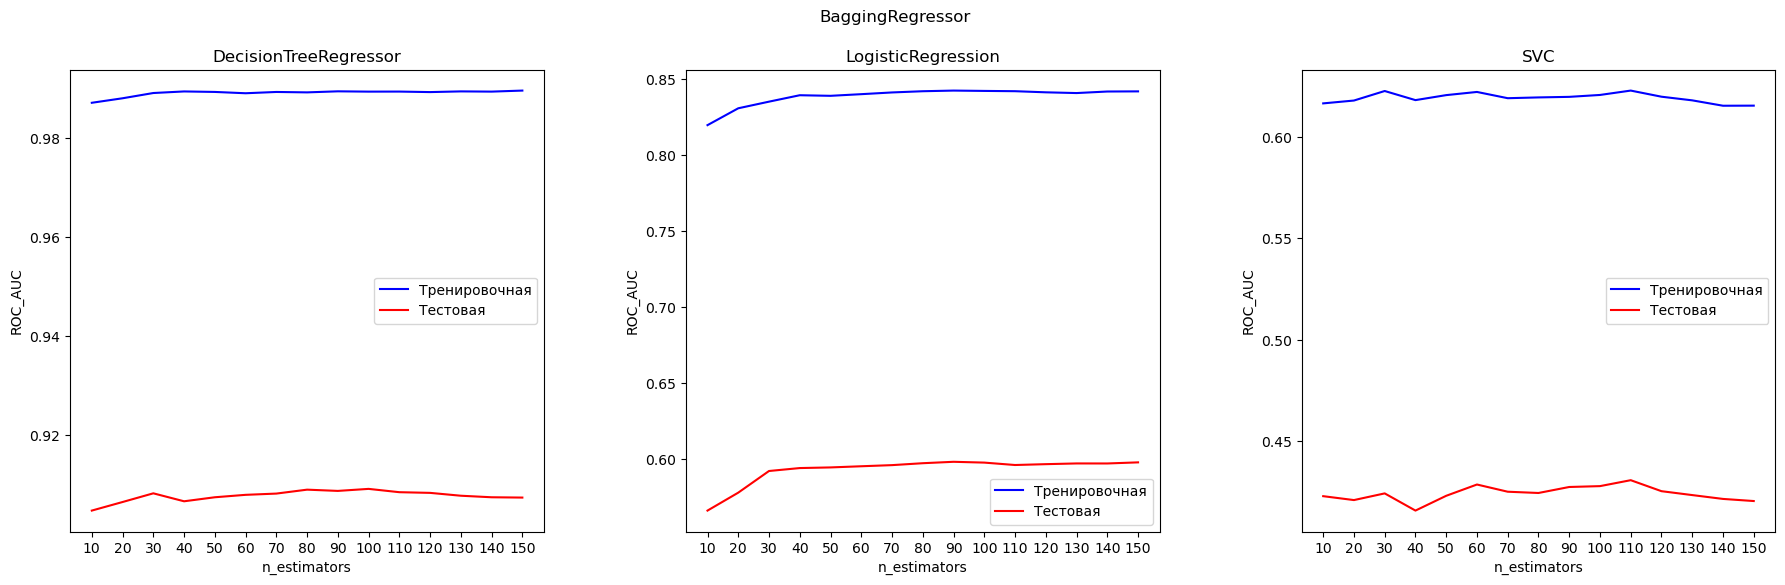

In [48]:
draw_graphics_bagg(parameters_values_bagg_tree_reg,
                   parameters_values_bagg_logreg_reg,
                   parameters_values_bagg_svc_reg,
                   "BaggingRegressor")

В качестве базовой модели был выбран <b>DecisionTreeRegressor</b>

In [49]:
# Сетка параметров для BaggingRegressor
bagging_params = {
    "estimator": [DecisionTreeRegressor(random_state=42)],
    # Базовый алгоритм для обучения на подвыборках данных
    "n_estimators": range(80, 121, 2),
    # Количество базовых алгоритмов в композиции
    "max_samples": [0.5, 0.8, 1.0],
    # Доля или количество объектов для обучения каждого базового алгоритма
    "max_features": [0.5, 0.8, 1.0],
    # Доля или количество признаков для обучения каждого базового алгоритма
    "bootstrap": [True, False],
    # Флаг, указывающий, выбирать ли объекты с возвращением или без
    "bootstrap_features": [True, False],
    # Флаг, указывающий, выбирать ли признаки с возвращением или без
}

print("BaggingRegressor:")
result_reg_algo = train_algorythm(
    BaggingRegressor(random_state=42, n_jobs=-1),
    bagging_params, "r2", x_train_reg,
    y_train_reg)
print("R^2: " + str(
    round(result_reg_algo.score(x_test_reg, y_test_reg), 3)))
round(
    cross_val_score(result_reg_algo, dataframe_train_reg[dataframe_all_reg],
                    dataframe_train_reg[result_column_reg], n_jobs=-1)[0], 3)

BaggingRegressor:
Исследование зависимости качества прогнозирования от параметров...
BaggingRegressor(bootstrap=False,
                 estimator=DecisionTreeRegressor(random_state=42),
                 max_samples=0.5, n_estimators=100, n_jobs=-1, random_state=42)
Best accuracy: 0.923
R^2: 0.91


0.899

### Графики зависимости значений метрик от значений параметров модели для бустинга

In [50]:
def create_and_train_boost_reg(parameters_values: dict,
                              model_name: str) -> None:
    """
    Функция, отвечающая за перебор различных параметров бустинга и вычисления
    значений оценок на тестовой и обучающей выборках.
    :param parameters_values: Словарь с перебираемыми параметрами
    :param algo_name: Название алгоритма
    :return: None
    """
    # Перебираем ключи и значения словаря parameters_values
    for parameter_name, parameter_value in parameters_values.items():

        if parameter_name == 'name':
            break
        # Получаем диапазон, тренировочные и тестовые значения из вложенного словаря
        parameter_range = parameter_value['range']
        train_scores = parameter_value['train_scores']
        test_scores = parameter_value['test_scores']

        for value in parameter_range:

            if parameter_name == "n_estimators":
                if model_name == "tree":
                    default_algo = AdaBoostRegressor(n_estimators=value,
                                                      estimator=DecisionTreeRegressor(
                                                          random_state=42),
                                                      random_state=3)
                elif model_name == "logreg":
                    default_algo = AdaBoostRegressor(n_estimators=value,
                                                     estimator=LogisticRegression(
                                                          random_state=42),
                                                     random_state=3)

                elif model_name == "svc":
                    default_algo = AdaBoostRegressor(n_estimators=value,
                                                     estimator=SVC(
                                                          probability=True,
                                                          kernel='linear',
                                                          random_state=42),
                                                     random_state=3)

            if parameter_name == "learning_rate":
                if model_name == "tree":
                    default_algo = AdaBoostRegressor(learning_rate=value,
                                                     estimator=DecisionTreeRegressor(
                                                          random_state=42),
                                                     random_state=3)
                elif model_name == "logreg":
                    default_algo = AdaBoostRegressor(learning_rate=value,
                                                     estimator=LogisticRegression(
                                                          random_state=42),
                                                     random_state=3)

                elif model_name == "svc":
                    default_algo = AdaBoostRegressor(learning_rate=value,
                                                     estimator=SVC(
                                                          probability=True,
                                                          kernel='linear',
                                                          random_state=42),
                                                     random_state=3)

            # Обучаем классификатор на обучающей выборке
            default_algo.fit(x_train_reg, y_train_reg)

            # Предсказываем вероятности для обучающей выборки
            y_pred = default_algo.predict(x_train_reg)

            # Вычисляем значение r2 на обучающей выборке
            train_score = r2_score(y_train_reg, y_pred)
            train_scores.append(train_score)

            # Предсказываем вероятности для тестовой выборки
            y_pred = default_algo.predict(x_test_reg)

            # Вычисляем значение r2 на тестовой выборке
            test_score = r2_score(y_test_reg, y_pred)
            test_scores.append(test_score)

In [51]:
parameters_values_ada_tree_reg = {
    "n_estimators": {
        'range': range(10, 151, 30),
        'train_scores': [],
        'test_scores': [],
    },
    "learning_rate": {
        'range': np.arange(0.1, 1.1, 0.2),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "DecisionTreeRegressor"
}

parameters_values_ada_logreg_reg = {
    "n_estimators": {
        'range': range(10, 151, 30),
        'train_scores': [],
        'test_scores': [],
    },
    "learning_rate": {
        'range': np.arange(0.1, 1.1, 0.2),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "LogisticRegression"
}

parameters_values_ada_svc_reg = {
    "n_estimators": {
        'range': range(10, 151, 30),
        'train_scores': [],
        'test_scores': [],
    },
    "learning_rate": {
        'range': np.arange(0.1, 1.1, 0.2),
        'train_scores': [],
        'test_scores': [],
    },
    "name": "SVC"
}

In [52]:
create_and_train_boost_reg(parameters_values_ada_tree_reg, "tree")
create_and_train_boost_reg(parameters_values_ada_logreg_reg, "logreg")
create_and_train_boost_reg(parameters_values_ada_svc_reg, "svc")

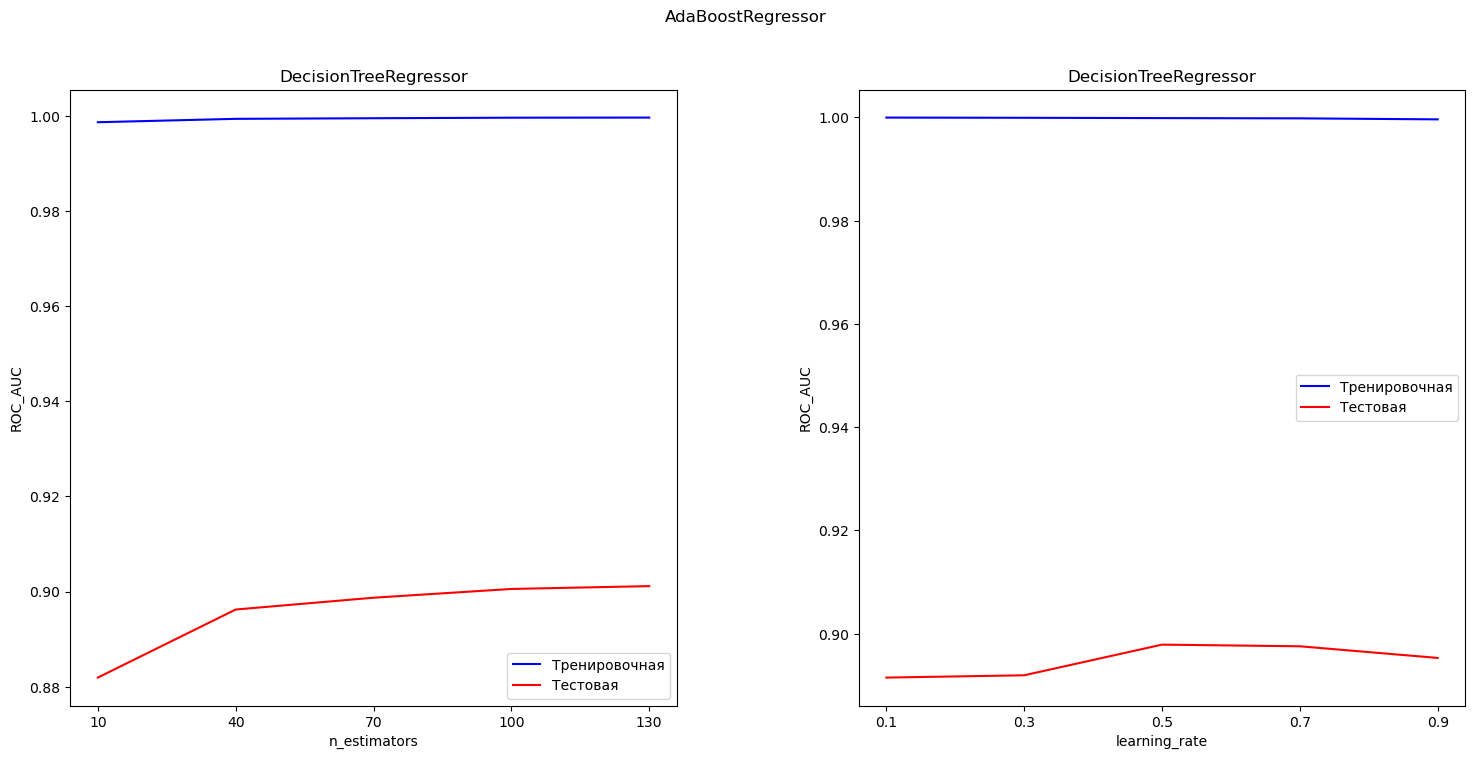

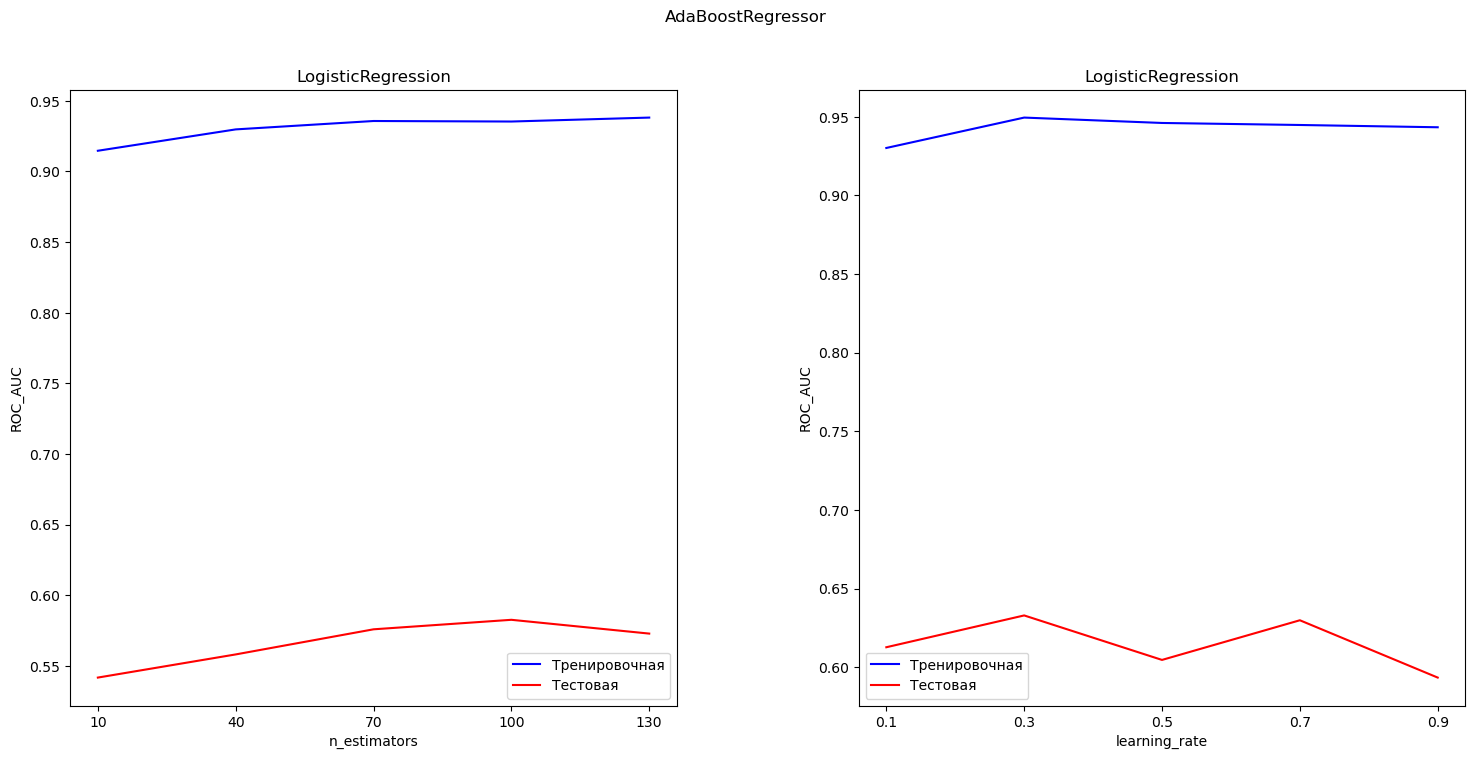

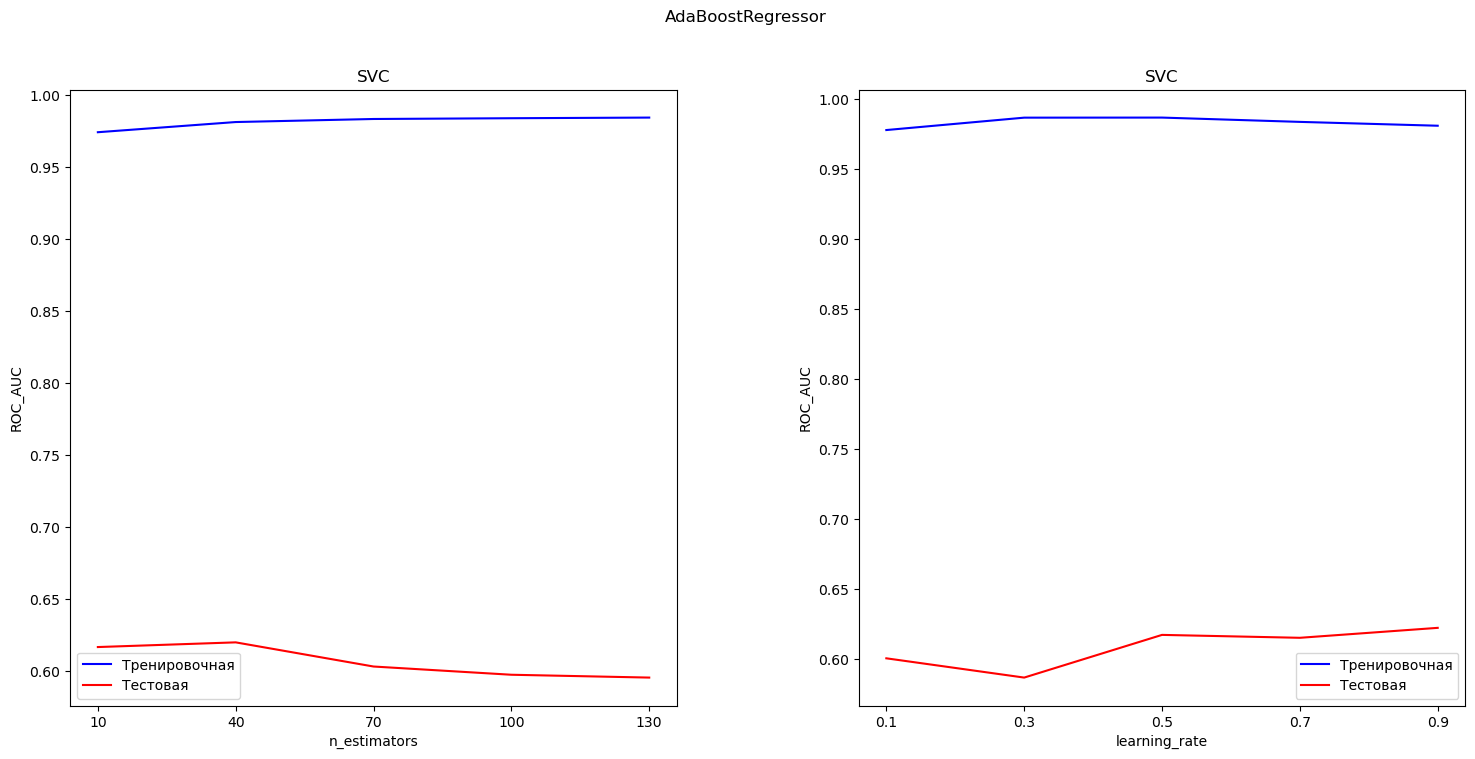

In [53]:
draw_graphics_boost(parameters_values_ada_tree_reg, "AdaBoostRegressor")
draw_graphics_boost(parameters_values_ada_logreg_reg, "AdaBoostRegressor")
draw_graphics_boost(parameters_values_ada_svc_reg, "AdaBoostRegressor")

В качестве базовой модели был выбран <b>DecisionTreeRegressor</b>.

### Бустинг

In [55]:
# Сетка параметров для AdaBoostClassifier
ada_boost_params = {
    "estimator": [DecisionTreeRegressor(random_state=42)],
    # базовый алгоритм для обучения на подвыборках с разными весами
    "n_estimators": range(110, 151, 2),
    # количество базовых алгоритмов в композиции
    "learning_rate": np.arange(0.6, 1.0, 0.1),
    # коэффициент обучения, который уменьшает вклад каждого базового алгоритма

}

print("AdaBoostRegressor:")
result_reg_adaboost = train_algorythm(AdaBoostRegressor(random_state=42),
                                      ada_boost_params, "r2",
                                      x_train_reg,
                                      y_train_reg)
print("R^2: " + str(
    round(result_reg_adaboost.score(x_test_reg, y_test_reg), 3)))
round(
    cross_val_score(result_reg_adaboost,
                    dataframe_train_reg[dataframe_all_reg],
                    dataframe_train_reg[result_column_reg], n_jobs=-1)[0], 3)

AdaBoostRegressor:
Исследование зависимости качества прогнозирования от параметров...
AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                  learning_rate=0.7999999999999999, n_estimators=130,
                  random_state=42)
Best accuracy: 0.92
R^2: 0.897


0.904

### Графики зависимости значений метрик от значений параметров модели для стекинга

In [56]:
def create_and_train_stack_reg(parameters: dict,
                               results: list, number: int) -> None:
    """
    Функция, отвечающая за перебор различных параметров стекинга и вычисления
    значений оценок на тестовой и обучающей выборках.
    :param parameters: Словарь с базовыми алгоритмами
    :param results: Список со всеми результатами
    :param number: Количество базовых алгоритмов
    :return: None
    """

    for combo in combinations(parameters, number):
        combo = list(combo)

        tmp_results = list()
        tmp_results.append(tuple([est[0] for est in combo]))

        stack = StackingRegressor(estimators=combo, n_jobs=-1)

        # Обучаем классификатор на обучающей выборке
        stack.fit(x_train_reg, y_train_reg)

        # Предсказываем вероятности для обучающей выборки
        y_pred = stack.predict(x_train_reg)

        # Вычисляем значение r2 на обучающей выборке
        train_score = r2_score(y_train_reg, y_pred)

        tmp_results.append(train_score)

        # Предсказываем вероятности для тестовой выборки
        y_pred = stack.predict(x_test_reg)

        # Вычисляем значение roc_auc на тестовой выборке
        test_score = r2_score(y_test_reg, y_pred)

        tmp_results.append(test_score)
        results.append(tmp_results)

In [57]:
estimators_reg = [('knn', KNeighborsRegressor()),
                  ('lr', LinearRegression()),
                  ('dt', DecisionTreeRegressor(random_state=42)),
                  ('rf', RandomForestRegressor(random_state=42)),
                  ('rg', Ridge(random_state=42)),
                  ('eln', ElasticNet(random_state=42))]

results_stack = list()
create_and_train_stack_reg(estimators_reg, results_stack, 4)

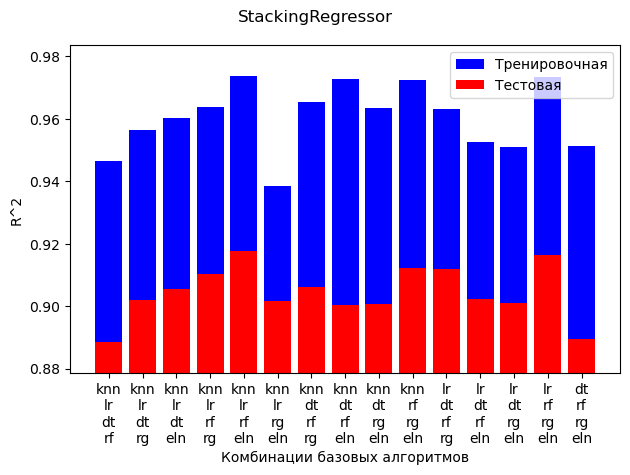

Лучшая комбинация:
knn
lr
rf
eln
Оценка R^2 на тестовой выборке:
0.918


In [58]:
draw_graphics_stack(results_stack, "StackingRegressor", "R^2")

### Стекинг

In [60]:
estimators = [
    ('knn', KNeighborsRegressor()),
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('eln', ElasticNet(random_state=42))
]

# Сетка параметров для StackingRegressor
stack_params = {
    "n_jobs": [-1],
    "cv": [3, 5, 10],
    "final_estimator": [
        RidgeCV(),
        LinearRegression(),
        DecisionTreeRegressor(random_state=42),
    ],
    # При установке в True позволяет передавать данные
    # входных признаков к финальному оценщику
    "passthrough": [True, False],
}

print("StackingRegressor:")
result_reg_stack = train_algorythm(StackingRegressor(estimators=estimators),
                                    stack_params, "r2",
                                    x_train_reg,
                                    y_train_reg)
print("R^2: " + str(
    round(result_reg_stack.score(x_test_reg, y_test_reg), 3)))
round(
    cross_val_score(result_reg_stack,
                    dataframe_train_reg[dataframe_all_reg],
                    dataframe_train_reg[result_column_reg], n_jobs=-1)[0], 3)

StackingRegressor:
Исследование зависимости качества прогнозирования от параметров...
StackingRegressor(cv=3,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('eln', ElasticNet(random_state=42))],
                  final_estimator=LinearRegression(), n_jobs=-1)
Best accuracy: 0.931
R^2: 0.917


0.917

### Сравнение результатов

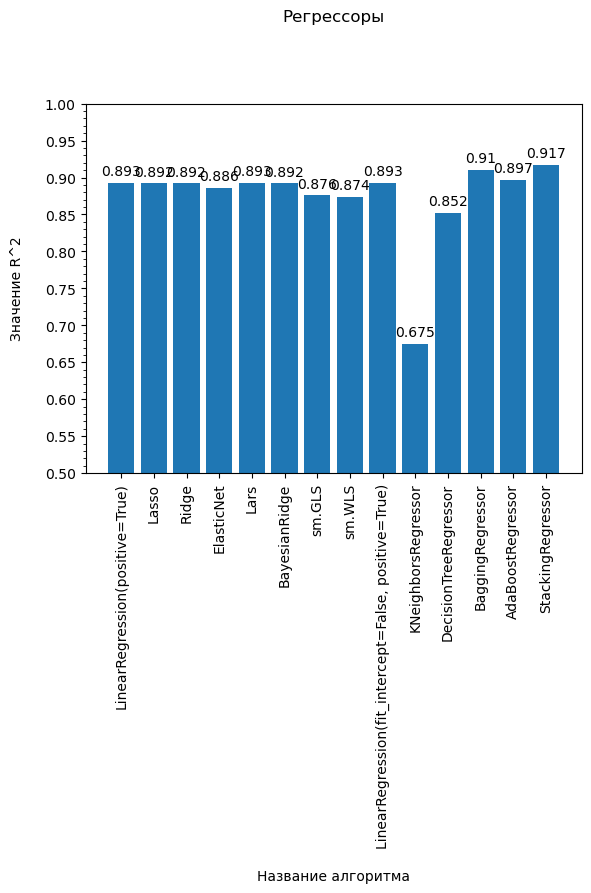

In [64]:
data = {
    "LinearRegression(positive=True)": 0.893,
    "Lasso": 0.892,
    "Ridge": 0.892,
    "ElasticNet": 0.886,
    "Lars": 0.893,
    "BayesianRidge": 0.892,
    "sm.GLS": 0.876,
    "sm.WLS": 0.874,
    "LinearRegression(fit_intercept=False, positive=True)": 0.893,
    "KNeighborsRegressor": 0.675,
    "DecisionTreeRegressor": 0.852,
    "BaggingRegressor": 0.91,
    "AdaBoostRegressor": 0.897,
    "StackingRegressor": 0.917
}

plot_histogram(data, "R^2", "Регрессоры")